In [ ]:
!pip install keras_nlp --quiet
!pip install tensorflow --quiet
!pip install seaborn --queit

In [1]:
import tensorflow as tf
import seaborn as sns
import keras_nlp
import numpy as np

2025-04-03 21:59:30.206697: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 21:59:30.223554: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 21:59:30.386344: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 21:59:30.538813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743728370.670163   88704 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743728370.70

In [2]:
tokenizer = keras_nlp.models.GPT2Tokenizer.from_preset("gpt2_base_en")

100%|██████████| 431/431 [00:00<00:00, 1.40MB/s]


100%|██████████| 618/618 [00:00<00:00, 1.38MB/s]
W0000 00:00:1743728383.183348   88704 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


100%|██████████| 0.99M/0.99M [00:00<00:00, 1.24MB/s]


100%|██████████| 446k/446k [00:00<00:00, 665kB/s]


In [ ]:
FILENAME = 'lora_model.tflite'

Agora precisamos criar um interpreter que será o responsável por ler o arquivo .tflite 

In [4]:
interpreter = tf.lite.Interpreter(model_path=FILENAME)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite delegate for select TF ops.
W0000 00:00:1743728404.471722   88704 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO: TfLiteFlexDelegate delegate: 0 nodes delegated out of 49 nodes with 0 partitions.

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
tf.lite.experimental.Analyzer.analyze(model_path=FILENAME,
                                      model_content=None,
                                      gpu_compatibility=False)


=== q_lora_model.tflite ===

Your TFLite model has '6' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the CALL_ONCE op takes
 as input and produces  as output.

Subgraph#0 get_weights() -> [T#0, T#69, T#189, T#107, T#119, T#1, T#184, T#18, T#28, T#115, T#23, T#20, T#58, T#6, T#105, T#89, T#87, T#32, T#104, T#103, T#50, T#91, T#83, T#101, T#172, T#7, T#45, T#39, T#140, T#34, T#182, T#27, T#77, T#14, T#24, T#49, T#62, T#16, T#5, T#100, T#125, T#97, T#179, T#109, T#92, T#59, T#37, T#57, T#122, T#124, T#186, T#143, T#61, T#112, T#181, T#9, T#70, T#41, T#68, T#60, T#142, T#42, T#192, T#177, T#29, T#111, T#98, T#30, T#25, T#8, T#12, T#121, T#47, T#71, T#72, T#10, T#108, T#178, T#74, T#17, T#54, T#55, T#180, T#33, T#65, T#123, T#90, T#86, T#22, T#40, T#134, T#63, T#38, T#21, T#88, T#187, T#80, T#174, T#48, T#56, T#3, T#128, T#67, T#81, T#31, T#35, T#135, T#84, T#51, T#96, T#78, T#133, T#137, T#13, T#11, T#176, T#95, T#183, T#36, T

Como podemos ver a maior quantidade de bytes armazenados do modelo está relacionado com a assinatura `train`.

Resposta:

--------------------------------------------------------------
```

Signature#1 key: 'infer'
- Subgraph: Subgraph#1
- Inputs: 
    'attention_mask' : T#1_0
    'input_ids' : T#1_1
- Outputs: 
    'logits' : T#1_1559

Signature#2 key: 'restore'
- Subgraph: Subgraph#2
- Inputs: 
    'checkpoint_path' : T#2_0
- Outputs: 
    'resposta' : T#2_2

Signature#3 key: 'save'
- Subgraph: Subgraph#3
- Inputs: 
    'checkpoint_path' : T#3_0
- Outputs: 
    'checkpoint_path' : T#3_0

Signature#4 key: 'train'
- Subgraph: Subgraph#4
- Inputs: 
    'attention_mask' : T#4_1
    'input_ids' : T#4_2
    'labels' : T#4_0
- Outputs: 
    'loss' : T#4_5785


              Model size: 1329984452 bytes
    Non-data buffer size:    1410668 bytes (00.11 %)
  Total data buffer size: 1328573784 bytes (99.89 %)
          - Subgraph#0  :  497759232 bytes (37.43 %)
          - Subgraph#1  :  652148908 bytes (49.03 %)
          - Subgraph#2  :        576 bytes (00.00 %)
          - Subgraph#3  :        372 bytes (00.00 %)
          - Subgraph#4  :  984809768 bytes (74.05 %)
          - Subgraph#5  :     393224 bytes (00.03 %)
    (Zero value buffers):      98328 bytes (00.01 %)
```

Você pode consultar todos métodos do Intepretes na documentação do [Tensorflow](https://ai.google.dev/edge/api/tflite/cc/class/tflite/impl/interpreter)

In [6]:
interpreter.get_signature_list()

{'get_weights': {'inputs': [],
  'outputs': ['lora_qa_0:0',
   'lora_qa_10:0',
   'lora_qa_11:0',
   'lora_qa_1:0',
   'lora_qa_2:0',
   'lora_qa_3:0',
   'lora_qa_4:0',
   'lora_qa_5:0',
   'lora_qa_6:0',
   'lora_qa_7:0',
   'lora_qa_8:0',
   'lora_qa_9:0',
   'lora_qb_0:0',
   'lora_qb_10:0',
   'lora_qb_11:0',
   'lora_qb_1:0',
   'lora_qb_2:0',
   'lora_qb_3:0',
   'lora_qb_4:0',
   'lora_qb_5:0',
   'lora_qb_6:0',
   'lora_qb_7:0',
   'lora_qb_8:0',
   'lora_qb_9:0',
   'tfgpt2lm_head_model/transformer/h_._0/attn/c_attn/bias:0',
   'tfgpt2lm_head_model/transformer/h_._0/attn/c_attn/weight:0',
   'tfgpt2lm_head_model/transformer/h_._0/attn/c_proj/bias:0',
   'tfgpt2lm_head_model/transformer/h_._0/attn/c_proj/weight:0',
   'tfgpt2lm_head_model/transformer/h_._0/ln_1/beta:0',
   'tfgpt2lm_head_model/transformer/h_._0/ln_1/gamma:0',
   'tfgpt2lm_head_model/transformer/h_._0/ln_2/beta:0',
   'tfgpt2lm_head_model/transformer/h_._0/ln_2/gamma:0',
   'tfgpt2lm_head_model/transformer/h_._

In [7]:
infer = interpreter.get_signature_runner('infer')
train = interpreter.get_signature_runner('train')
save = interpreter.get_signature_runner('save')
restore = interpreter.get_signature_runner('restore')

Para utilizar cada uma das assinaturas em python precisamos estar cientes do formato de entrada

#### Assinatura Infer

In [8]:
## Precisamos criar reformatar o array para o shape que definimos para assinatura de inferência, dessa forma, vamos realizar o reshape para isso.
tokens = tokenizer("My name is").numpy()
input_ids = np.reshape(tokens, newshape=(1, tokens.shape[0]))
mask = np.ones(shape=input_ids.shape, dtype=np.int32) # Também não é possível chamar uma assinatura sem passar parâmetros, dessa forma precisamos criar a attention mask

In [9]:
# Em python é simples, agora basta atribuir a resposta da função, a uma variáveil
response = infer(input_ids = input_ids, attention_mask = mask)
response

{'logits': array([[-72.558945, -72.00194 , -76.5176  , ..., -81.68973 , -78.66602 ,
         -73.135826]], dtype=float32)}

O retorno da função, são os logits que definimos na assinatura, agora basta pegar o indice com o maior valor, representando o token com maior probabilidade

In [10]:
logits = response['logits']
next_token = logits.argmax().tolist()
next_token

257

In [11]:
tokenizer.detokenize([next_token])

' a'

### Assinatura Train

Podemos também mudar o comportamento do modelo com a assinatura train. Vamos fazer o modelo aprender nosso nome

In [12]:
NOME = "Rafael"

In [13]:
def model_input_train(string):
    """
        O objetivo dessa função é fazer criar sequência de tokens e labels para que o modelo aprenda uma frase que você deseja, nesse caso:
        "My name is {NOME}"
        Para isso vamos criar 3 matrizes, inputs, mask labels. Onde inputs, será a sequência de tokens que o modelo irá receber token a token
        mask representará quais tokens o modelo deverá prestar levar em consideração durante o treinamento, e o labels represeta o próximo token
    """
    tokens = tokenizer(string)
    inputs = []
    labels = []
    size = len(tokens)
    for i in range(1, size):
        inp = np.zeros(size, dtype=np.int32)
        label = np.zeros(size, dtype=np.int32)
        for j in range(size):
            if j >= i:
                break
            inp[i-j-1] = tokens[i-j-1]
            label[i-j-1] = tokens[i-j-1]
            label[i-j] = tokens[i-j]
                
        inputs.append(inp)
        labels.append(label)
    inputs = tf.convert_to_tensor(inputs)
    labels = tf.convert_to_tensor(labels)
    mask = np.full_like(inputs, fill_value=0, dtype=np.int32)
    for i, sample in enumerate(inputs):
        for j, v in enumerate(sample):
            if v != 0:
                mask[i][j] = 1
    mask = tf.convert_to_tensor(mask)
    return {"input_ids": inputs, "attention_mask": mask, "labels": labels}

In [14]:
data = model_input_train(f"My name is {NOME}")

In [15]:
data['input_ids']

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[3666,    0,    0,    0],
       [3666, 1438,    0,    0],
       [3666, 1438,  318,    0]], dtype=int32)>

In [16]:
data["attention_mask"]

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 0]], dtype=int32)>

In [17]:
data['labels']

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 3666,  1438,     0,     0],
       [ 3666,  1438,   318,     0],
       [ 3666,  1438,   318, 31918]], dtype=int32)>

In [18]:
losses = []
for e in range(30):
    response = train(
        **data
    )
    loss = response['loss'][0]
    losses.append(loss)
    print(f"Epoch {e} - Loss: {loss} ")

RuntimeError: unsupported quantized dimension 1 in tensor #155 in node #2778Node number 5449 (TfLiteXNNPackDelegate) failed to prepare.

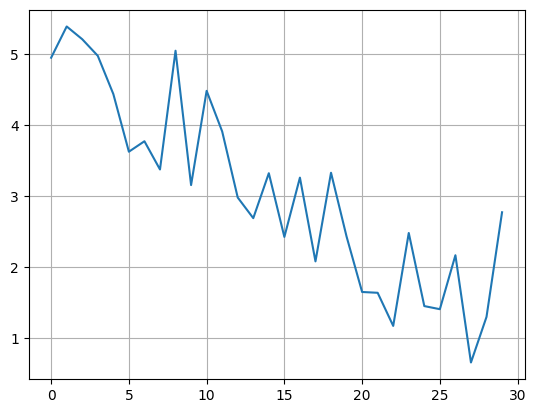

In [19]:
ax = sns.lineplot(y=losses, x=list(range(len(losses))))
ax.grid(True)

In [20]:
tokens = tokenizer("My name is").numpy()
input_ids = np.reshape(tokens, newshape=(1, tokens.shape[0]))
mask = np.ones(shape=input_ids.shape, dtype=np.int32)
# Em python é simples, agora basta atribuir a resposta da função, a uma variáveil
response = infer(input_ids = input_ids, attention_mask = mask)
logits = response['logits']
next_token = logits.argmax().tolist()
tokenizer.detokenize([next_token])

' Rafael'

Dessa forma, conseguimos mudar o comportamento do modelo

### Save

Podemos também salvar os pesos dos adapters teinados para conseguir utilizar o modelo treinado sem a necessidade de retreiná-lo.

In [21]:
file_path = np.array("save_lora_weights")
save(checkpoint_path = file_path)

{'checkpoint_path': array(b's\x00\x00\x00a\x00\x00\x00v\x00\x00\x00e\x00\x00\x00_\x00\x00\x00l\x00\x00\x00o\x00\x00\x00r\x00\x00\x00a\x00\x00\x00_\x00\x00\x00w\x00\x00\x00e\x00\x00\x00i\x00\x00\x00g\x00\x00\x00h\x00\x00\x00t\x00\x00\x00s\x00\x00\x00',
       dtype=object)}

### Restore

De forma similar conseguimos carregar os pesos do modelo pré-treinado

In [22]:
# Carregando o modelo novamente
interpreter = tf.lite.Interpreter(model_path=FILENAME)
interpreter.allocate_tensors()

W0000 00:00:1742838315.758216   67424 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [23]:
infer = interpreter.get_signature_runner('infer')
train = interpreter.get_signature_runner('train')
save = interpreter.get_signature_runner('save')
restore = interpreter.get_signature_runner('restore')

In [24]:
def get_next_token(prompt):
    tokens = tokenizer(prompt).numpy()
    input_ids = np.reshape(tokens, newshape=(1, tokens.shape[0]))
    mask = np.ones(shape=input_ids.shape, dtype=np.int32)
    # Em python é simples, agora basta atribuir a resposta da função, a uma variáveil
    response = infer(input_ids = input_ids, attention_mask = mask)
    logits = response['logits']
    next_token = logits.argmax().tolist()
    return tokenizer.detokenize([next_token])

In [25]:
get_next_token("My name is")

' John'

In [26]:
restore(checkpoint_path = file_path)

{'resposta': array(b'restored', dtype=object)}

In [27]:
get_next_token("My name is")

' Rafael'